## Introduction:

**Problem Statement:** 
In this hands on project ,the goal is to predict the percentage of marks that a student is expected to score based upon the
number of hours they studied.

**Dataset:**
In this dataset ,there are only two variables:
- Hours    : Number of hours a student is spending on studies.

- Scores   : percentage of marks.


**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**


### Step 1:Importing the necessary libraries

In [1]:
# Importing all required libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns

#Importing Sklearn function for splitting dataset for training and testing
from sklearn.model_selection  import train_test_split


#Statistical library
from scipy.stats import norm

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

### Step 2: Load the Dataset and printing the first ten  rows

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Step 3: Exploratory Data Analysis:

In [3]:
#Let's check the number of rows and columns 
df.shape

(25, 2)

**Description: As we can see that there are 25 observations and 2 variables**

In [4]:
#Let's check the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Description:As we can see  both variables are of numeric types**

In [7]:
#five pont summary by using describe function

df.describe(include = 'all' ).transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [8]:
#Checking the presence of missing values :
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Description:As there is no missing values in the dataset.**

### Data Distribution:

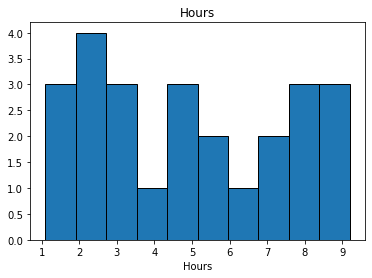

In [10]:
##frequency distribution of hours
plt.hist(df.Hours,  edgecolor='black')
plt.title('Hours')
plt.xlabel('Hours')
plt.show()

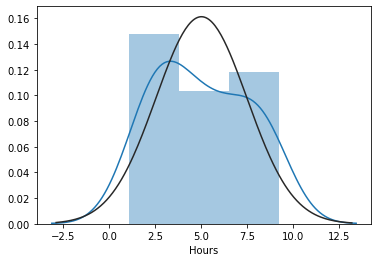

In [11]:
#seaborn distplot for hours,where the black line highlighting the possible  normal distribution curve.

sns.distplot(df['Hours'] ,fit = norm)

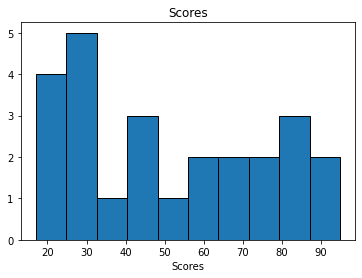

In [14]:
##frequency distribution of scores
plt.hist(df.Scores,  edgecolor='black')
plt.title('Scores')
plt.xlabel('Scores')
plt.show()

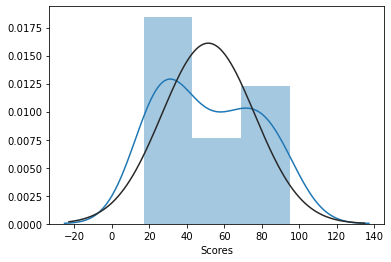

In [15]:
#seaborn distplot for scores,where the black line highlighting the possible  normal distribution curve.

sns.distplot(df['Scores'] ,fit = norm)

### Step 4:Checking the presence of outliers

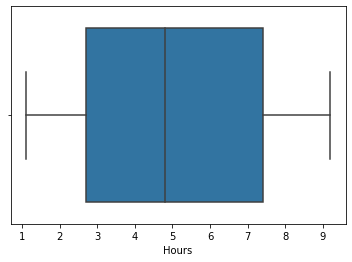

In [12]:
#checking Outliers in the column  using boxplot

sns.boxplot(df['Hours'])

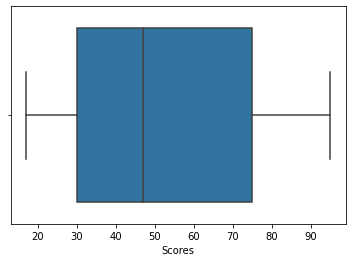

In [13]:
sns.boxplot(df['Scores'])

**Description: There is no outliers in the Dataset.**

### Step 5: Data Visualization.

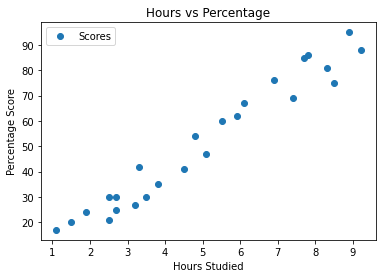

In [16]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

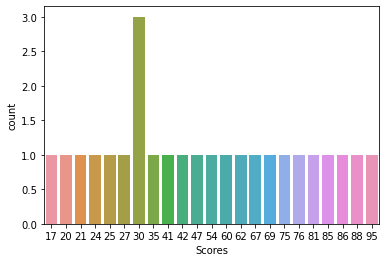

In [18]:
#Count the scores .
sns.countplot(df['Scores'])

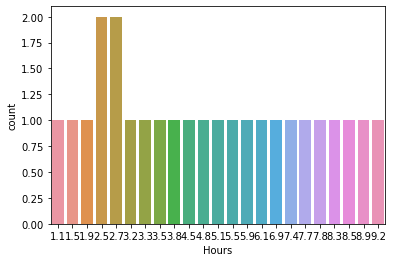

In [19]:
#Count the Hours
sns.countplot(df['Hours'])

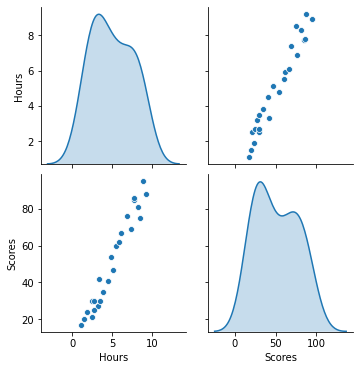

In [22]:
#One more multivariate analysis,here pairplot is used.

sns.pairplot(df,diag_kind ='kde')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Step 6 : Divide the training and test data**

The next step is to divide the data into "Features" (inputs) and "labels" (outputs).



In [52]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [53]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)  

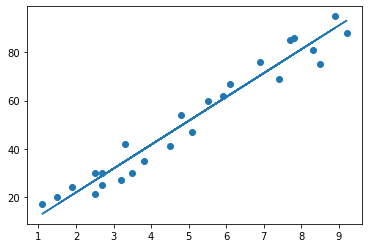

In [39]:
import sklearn

# Plotting the regression line
line = linear.coef_*X+ linear.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Step 7:Model training and Evaluation:**

In [83]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'SVM',
                       'Gradient Boosted']
   
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model5 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse','Accuracy'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        acc = linear.score(X_test, y_test)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse,acc]
    
    return results


In [80]:
results = evaluate(X_train, X_test, y_train, y_test)

**Visual Comparison of Models**

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


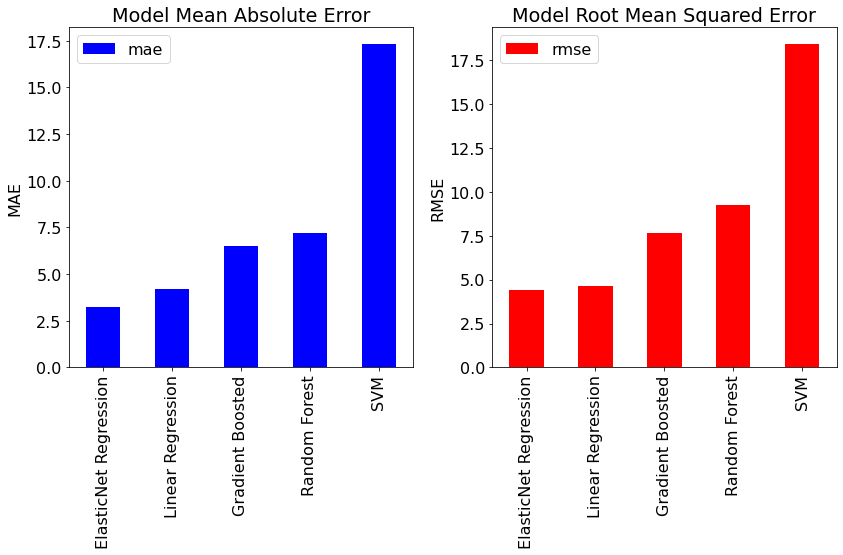

In [81]:
%pylab
figsize(12, 8)
plt.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [82]:
results

,mae,rmse,Accuracy
Linear Regression,4.18386,4.64745,0.945491
ElasticNet Regression,3.21343,4.39916,0.945491
Random Forest,7.202,9.2423,0.945491
SVM,17.3548,18.4446,0.945491
Gradient Boosted,6.48985,7.66923,0.945491


**Description : I have built a function called evaluate(),The goal of this function is to check all the algorithms.In this funtion all the algorithms are trained and tested and the function returns the RMSE ,MAE and accuracy of every algorithm.In terms of accuracy all the algorithms are giving same results but as we talk about MAE and RMSE scores Linear regression and ElasticNet Regression is winner i.e lower mae and rmse.And SVM is giving the worse scores.So for futher prediction we will use
linear Regression Model**

### Implementation of Final Model: Linear Regression

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope.
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [84]:

linear.fit(X_train, y_train)
acc = linear.score(X_test, y_test)
print("Accuracy: " + str(acc))


Accuracy: 0.9454906892105354


In [86]:
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")



-------------------------
Coefficient: 
 [9.91065648]
Intercept: 
 2.018160041434662
-------------------------


In [87]:
predictions = linear.predict(X_test)

In [89]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student study for 9.25 hrs in a day?

In [102]:
# You can also test with your own data
hours = (9.25)
own_pred = linear.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737539


### Step 8: Saving the model:

In [101]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(linear) 
  
# Load the pickled model 
linear_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
linear_from_pickle.predict(X_test) 

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions.

### Summary:
We have tried many different models and chose linear regression for our final built.The main question of this project is to predict the scores if a student will spend 9.25 hour and our model is predicting the score of 93.7%.
